In [1]:
import numpy as np
import pandas as pd

/home/kajetan/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [8]:
s = pd.Series(np.random.rand(5) + 1j, index=np.arange(5), dtype=np.complex128)
s

0    0.264695+1.000000j
1    0.337242+1.000000j
2    0.677298+1.000000j
3    0.631128+1.000000j
4    0.964522+1.000000j
dtype: complex128

In [9]:
s.index

Index([0, 1, 2, 3, 4], dtype='int64')

In [11]:
s.iloc[0]

(0.2646947023487287+1j)

In [12]:
s.iloc[:3]

0    0.264695+1.000000j
1    0.337242+1.000000j
2    0.677298+1.000000j
dtype: complex128

In [16]:
s[s > s.mean()]

2    0.677298+1.000000j
3    0.631128+1.000000j
4    0.964522+1.000000j
dtype: complex128

In [17]:
s.mean()

(0.5749769928772303+1j)

In [18]:
s

0    0.264695+1.000000j
1    0.337242+1.000000j
2    0.677298+1.000000j
3    0.631128+1.000000j
4    0.964522+1.000000j
dtype: complex128

In [21]:
s.iloc[[2, 3, 4]] == s[[2, 3, 4]]

2    True
3    True
4    True
dtype: bool

In [22]:
np.exp(s[0])

(0.7040317896876366+1.0964645476621406j)

In [24]:
s.to_numpy(), s.to_numpy().dtype

(array([0.2646947 +1.j, 0.3372425 +1.j, 0.67729827+1.j, 0.63112777+1.j,
        0.96452172+1.j]),
 dtype('complex128'))

In [27]:
s["e"] = 1
s

0    0.264695+1.000000j
1    0.337242+1.000000j
2    0.677298+1.000000j
3    0.631128+1.000000j
4    0.964522+1.000000j
e    1.000000+0.000000j
dtype: complex128

In [28]:
"e" in s

True

In [29]:
"f" in s

False

In [30]:
s["e"]

(1+0j)

In [32]:
# s["f"]  ERROR

In [33]:
s.get("f")

In [35]:
s.get("e") == s["e"]

True

In [36]:
s.get("f", np.nan)

nan

In [37]:
s + s

0    0.529389+2.000000j
1    0.674485+2.000000j
2    1.354597+2.000000j
3    1.262256+2.000000j
4    1.929043+2.000000j
e    2.000000+0.000000j
dtype: complex128

In [38]:
s.iloc[1:] + s.iloc[:-1]

0         NaN+1.000000j
1    0.674485+2.000000j
2    1.354597+2.000000j
3    1.262256+2.000000j
4    1.929043+2.000000j
e         NaN+0.000000j
dtype: complex128

In [45]:
s = pd.Series(np.random.randn(5), name="something")
s, s.name

(0   -1.456092
 1    2.198411
 2    0.439747
 3   -1.556855
 4    1.187221
 Name: something, dtype: float64,
 'something')

In [48]:
s2 = s.rename("different")
s2, s2.name

(0   -1.456092
 1    2.198411
 2    0.439747
 3   -1.556855
 4    1.187221
 Name: different, dtype: float64,
 'different')

In [49]:
d = {"one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}
d

{'one': a    1.0
 b    2.0
 c    3.0
 dtype: float64,
 'two': a    1.0
 b    2.0
 c    3.0
 d    4.0
 dtype: float64}

In [53]:
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [55]:
df['one'] += df['two']
df

,one,two
a,2.0,1.0
b,4.0,2.0
c,6.0,3.0
d,NaN,4.0


In [57]:
df.index, df.columns

(Index(['a', 'b', 'c', 'd'], dtype='object'),
 Index(['one', 'two'], dtype='object'))

In [61]:
d = {"one": np.arange(4), "two": np.arange(4, 0, step=-1)}
pd.DataFrame(d)

,one,two
0,0,4
1,1,3
2,2,2
3,3,1


In [62]:
pd.DataFrame(d, index=["a", "b", "c", "d"])

,one,two
a,0,4
b,1,3
c,2,2
d,3,1


In [63]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])
data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [64]:
pd.DataFrame(data, index=["first", "second"])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [65]:
pd.DataFrame(data, columns=["C", "A", "B"])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


In [66]:
pd.DataFrame(
    {
        ("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
        ("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
        ("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
        ("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
        ("b", "b"): {("A", "D"): 9, ("A", "B"): 10},
    }
)

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

In [67]:
ser = pd.Series(range(3), index=list("abc"), name="ser")
pd.DataFrame(ser)

,ser
a,0
b,1
c,2


In [78]:
from collections import namedtuple

Point = namedtuple("Point", "x y")
pd.DataFrame([Point(0, 0), Point(0, 3), (0, 1)])

,x,y
0,0,0
1,0,3
2,0,1


In [79]:
Point3D =  namedtuple("Point3D", "x y z")
pd.DataFrame([Point3D(0, 0, 0), Point3D(0, 3, 5), Point(2, 3)])

,x,y,z
0,0,0,0.0
1,0,3,5.0
2,2,3,NaN


In [80]:
from dataclasses import make_dataclass

Point = make_dataclass("Point", [("x", int), ("y", float)])
pd.DataFrame([Point(0, 0.3), Point(1, 1.3), Point(2, np.exp(1))])

,x,y
0,0,0.300000
1,1,1.300000
2,2,2.718282


In [90]:
df = pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]))
df

,A,B
0,1,4
1,2,5
2,3,6


In [94]:
df = df.T  # change to orient="index" in pd.DataFrame.from_dict

In [95]:
df.columns = ['X', 'Y', 'Z']
df

,X,Y,Z
A,1,2,3
B,4,5,6


In [98]:
del df["Y"]
df

,X,Z
A,1,3
B,4,6


In [101]:
df.pop("Z")
df

,X
A,1
B,4


In [104]:
df["foo"] = np.random.randn(2)
df

,X,foo
A,1,0.334206
B,4,-0.779788


In [106]:
df["one_trunc"] = df["X"][:2]
df

,X,foo,one_trunc
A,1,0.334206,1
B,4,-0.779788,4


In [107]:
df.insert(1, "bar", df["foo"])
df

,X,bar,foo,one_trunc
A,1,0.334206,0.334206,1
B,4,-0.779788,-0.779788,4


In [108]:
iris = pd.read_csv("data/iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [109]:
iris.assign(sepal_ratio=iris["SepalWidthCm"] / iris["SepalLengthCm"]).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_ratio
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [110]:
iris.assign(sepal_ration=lambda x: (x["SepalWidthCm"] / x["SepalLengthCm"])).head()  # assing() return copy of the data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_ration
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


<Axes: xlabel='SepalRatio', ylabel='PetalRatio'>

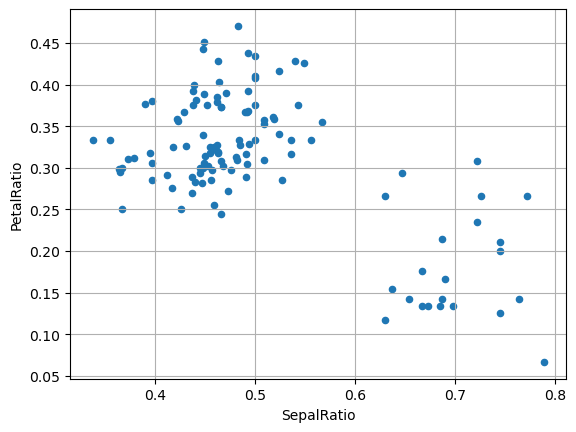

In [114]:
iris.query("SepalLengthCm > 5").assign(
    SepalRatio=lambda x: x.SepalWidthCm / x.SepalLengthCm,
    PetalRatio=lambda x: x.PetalWidthCm / x.PetalLengthCm,
).plot(kind="scatter", x="SepalRatio", y="PetalRatio", grid=True)

In [115]:
df

,X,bar,foo,one_trunc
A,1,0.334206,0.334206,1
B,4,-0.779788,-0.779788,4


In [118]:
df.loc["A"]  # Select row by label

X            1.000000
bar          0.334206
foo          0.334206
one_trunc    1.000000
Name: A, dtype: float64

In [119]:
df["bar"]   # Select column

A    0.334206
B   -0.779788
Name: bar, dtype: float64

In [121]:
df.iloc[0]  # Select row by integer location

X            1.000000
bar          0.334206
foo          0.334206
one_trunc    1.000000
Name: A, dtype: float64

In [122]:
df[1:]  # Slice rows

,X,bar,foo,one_trunc
B,4,-0.779788,-0.779788,4


In [125]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])
df2 = pd.DataFrame(np.random.randn(7, 3), columns=["A", "B", "C"])

df + df2

,A,B,C,D
0,1.810559,-0.039275,0.712351,NaN
1,0.360428,1.998803,0.539975,NaN
2,-2.145896,-0.289890,-0.217506,NaN
3,-1.291361,1.579336,-3.059211,NaN
4,0.247215,0.177100,-1.050844,NaN
5,-0.706172,-0.496086,-2.368370,NaN
6,-3.179910,0.096926,-0.722703,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [129]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,-1.922695,0.421488,1.944535,1.009201
2,0.009632,0.316182,0.204647,-1.335055
3,-1.368218,0.406857,-1.464527,-1.401771
4,0.336637,-1.087281,1.607104,-0.417840
5,-1.052401,-1.285219,-0.663944,0.901036
6,-3.455935,0.697498,0.123466,-1.495999
7,0.528967,0.499193,-0.186573,2.140294
8,-0.700977,0.093023,0.693436,-1.064000
9,0.108764,0.499548,0.063310,-1.122992


In [131]:
1j / df

,A,B,C,D
0,0.000000+14.381855j,0.000000+3.086963j,-0.000000- 4.001288j,0.000000+ 2.443307j
1,-0.000000- 0.539618j,0.000000+1.341505j,0.000000+ 0.590104j,0.000000+ 0.704979j
2,0.000000+12.631934j,0.000000+1.562194j,-0.000000-22.088348j,-0.000000- 1.080178j
3,-0.000000- 0.770009j,0.000000+1.368363j,-0.000000- 0.583279j,-0.000000- 1.007568j
4,0.000000+ 2.462028j,-0.000000-1.310036j,0.000000+ 0.736820j,-0.000000-116.837604j
5,-0.000000- 1.017430j,-0.000000-1.040284j,-0.000000- 1.094255j,0.000000+ 0.763174j
6,-0.000000- 0.295299j,0.000000+0.979009j,-0.000000- 7.908050j,-0.000000- 0.920202j
7,0.000000+ 1.670847j,0.000000+1.214867j,-0.000000- 2.290992j,0.000000+ 0.392222j
8,-0.000000- 1.583669j,0.000000+2.398278j,0.000000+ 2.254706j,-0.000000- 1.527374j
9,0.000000+ 5.608642j,0.000000+1.214343j,-0.000000- 5.358787j,-0.000000- 1.401128j


In [135]:
df1 = pd.DataFrame({"a": [1, 0, 1, 0], "b": [0, 1, 1, 0]}, dtype=bool)
df2 = pd.DataFrame({"a": [0, 1, 1, 0], "b": [1, 1, 0, 0]}, dtype=bool)
df1 & df2  # and

,a,b
0,False,False
1,False,True
2,True,False
3,False,False


In [136]:
df1 | df2  # or

,a,b
0,True,True
1,True,True
2,True,True
3,False,False


In [137]:
df1 ^ df2  # xor

,a,b
0,True,True
1,True,False
2,False,True
3,False,False


In [138]:
df1

,a,b
0,True,False
1,False,True
2,True,True
3,False,False


In [139]:
np.transpose(df1)

,0,1,2,3
a,True,False,True,False
b,False,True,True,False


In [145]:
df1.shape

(4, 2)

In [148]:
np.asarray(df1), np.asarray(df1).shape, np.asarray(df).dtype

(array([[ True, False],
        [False,  True],
        [ True,  True],
        [False, False]]),
 (4, 2),
 dtype('float64'))

In [154]:
ser1 = pd.Series([1, 2, 3, 7], index=["a", "b", "c", "d"])
ser2 = pd.Series([1, 3, 5, 9], index=["a", "b", "c", "d"])

ser1

a    1
b    2
c    3
d    7
dtype: int64

In [157]:
np.remainder(ser1, ser2) == ser1 % ser2

a    True
b    True
c    True
d    True
dtype: bool

In [162]:
ser3 = ser1.copy()
ser3["e"] = np.pi

np.remainder(ser1, ser3)

a    0.0
b    0.0
c    0.0
d    0.0
e    NaN
dtype: float64

In [164]:
ser = pd.Series([1, 2, 3, 9])
idx = pd.Index([4, 5, 6, 3])
np.maximum(ser, idx)

0    4
1    5
2    6
3    9
dtype: int64

In [165]:
baseball_master = pd.read_csv("data/Master.csv")
baseball_master

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18841,zupofr01,1939.0,8.0,29.0,USA,CA,San Francisco,2005.0,3.0,25.0,...,Zupo,Frank Joseph,182.0,71.0,L,R,1957-07-01,1961-05-09,zupof101,zupofr01
18842,zuvelpa01,1958.0,10.0,31.0,USA,CA,San Mateo,NaN,NaN,NaN,...,Zuvella,Paul,173.0,72.0,R,R,1982-09-04,1991-05-02,zuvep001,zuvelpa01
18843,zuverge01,1924.0,8.0,20.0,USA,MI,Holland,2014.0,9.0,8.0,...,Zuverink,George,195.0,76.0,R,R,1951-04-21,1959-06-15,zuveg101,zuverge01
18844,zwilldu01,1888.0,11.0,2.0,USA,MO,St. Louis,1978.0,3.0,27.0,...,Zwilling,Edward Harrison,160.0,66.0,L,L,1910-08-14,1916-07-12,zwild101,zwilldu01


In [166]:
baseball_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerID      18846 non-null  object 
 1   birthYear     18703 non-null  float64
 2   birthMonth    18531 non-null  float64
 3   birthDay      18382 non-null  float64
 4   birthCountry  18773 non-null  object 
 5   birthState    18220 non-null  object 
 6   birthCity     18647 non-null  object 
 7   deathYear     9336 non-null   float64
 8   deathMonth    9335 non-null   float64
 9   deathDay      9334 non-null   float64
 10  deathCountry  9329 non-null   object 
 11  deathState    9277 non-null   object 
 12  deathCity     9325 non-null   object 
 13  nameFirst     18807 non-null  object 
 14  nameLast      18846 non-null  object 
 15  nameGiven     18807 non-null  object 
 16  weight        17975 non-null  float64
 17  height        18041 non-null  float64
 18  bats          17655 non-nu

In [168]:
pd.DataFrame(np.random.randn(3, 10))

,0,1,2,3,4,5,6,7,8,9
0,-0.477951,-1.692212,-0.553588,0.393461,0.339750,1.210150,-0.279797,-0.782465,0.995316,-0.206921
1,-0.578528,-0.371467,-1.612242,-0.277389,-0.817110,-2.237687,-1.013505,2.217498,0.427374,-0.251467
2,-1.355715,-1.114799,1.239434,0.095595,1.303694,0.815312,-0.264913,0.029593,0.594884,-0.825927


In [180]:
pd.set_option("display.width", 40)  # default is 80
pd.set_option("display.max_colwidth", 2)
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.047029,0.127234,-1.107649,-1.903316,0.627603,-0.439800,0.375715,-2.206380,0.378788,0.441078,-0.670413,1.332564
1,0.997787,-0.198539,0.777778,-1.801624,0.204157,0.144559,0.039607,0.530461,-0.026417,-3.438925,1.744813,1.035338
2,-0.890350,1.479046,-0.664544,-1.431225,-0.945766,0.544239,0.592712,0.354268,-0.532848,-1.062272,-0.875022,-0.531992


In [182]:
df = pd.DataFrame({"foo1": np.random.randn(5), "foo2": np.random.randn(5)})
df

,foo1,foo2
0,-0.700547,2.317126
1,0.811873,-0.128968
2,2.155502,-0.970935
3,1.336351,-0.288418
4,1.294046,-0.777118
